# California Housing Price Prediction 

## Project Overview
This project implements a complete machine learning pipeline to predict median house prices in California districts using census data and geographical features. The goal is to build an accurate predictive model that can assist in real estate valuation, investment analysis, and housing market assessment.

## Business Objectives

### Primary Objective
Develop a reliable predictive model for median house values in California districts to support:
- Real estate investment decisions
- Property valuation and assessment
- Housing market trend analysis
- Urban planning and development strategies

### Key Business Goals

1. **Accuracy & Reliability**
   - Minimize prediction error to support confident decision-making
   - Provide consistent performance across different California regions
   - Enable accurate housing price estimations for unseen districts

2. **Actionable Insights**
   - Identify key factors influencing housing prices
   - Quantify the impact of location, demographics, and income on property values
   - Support data-driven real estate strategies

3. **Scalability & Efficiency**
   - Create a reusable pipeline for ongoing housing market analysis
   - Enable rapid evaluation of housing price trends
   - Support integration with existing real estate platforms

4. **Risk Mitigation**
   - Reduce uncertainty in property investment decisions
   - Provide evidence-based valuation estimates
   - Help identify overvalued or undervalued housing markets

## Business Impact
- **For Investors**: Better risk assessment and ROI calculations for real estate investments
- **For Agencies**: Improved accuracy in property tax assessments and urban planning
- **For Developers**: Data-driven decisions on new construction locations and pricing
- **For Homeowners**: Realistic valuation estimates for buying/selling decisions

## Success Metrics
- Root Mean Squared Error (RMSE) below industry standards
- High correlation between predicted and actual values
- Consistent performance across different income categories
- Actionable feature importance rankings for business decisions

In [69]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:

def load_housing_data():
    tarball_path = Path('datasets/housing.tgz')

    if not tarball_path.is_file():
        Path('datasets').mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        print("Downloaded housing dataset!")

    with tarfile.open(tarball_path) as housing_data:
        housing_data.extractall(path=Path('datasets'))
        print("Extracted housing dataset!")

    csv_path = Path('datasets/housing/housing.csv')
    return pd.read_csv(csv_path)


housing = load_housing_data()

Extracted housing dataset!


C:\Users\Ewis\AppData\Local\Temp\ipykernel_17932\2781348030.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_data.extractall(path=Path('datasets'))


In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [45]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

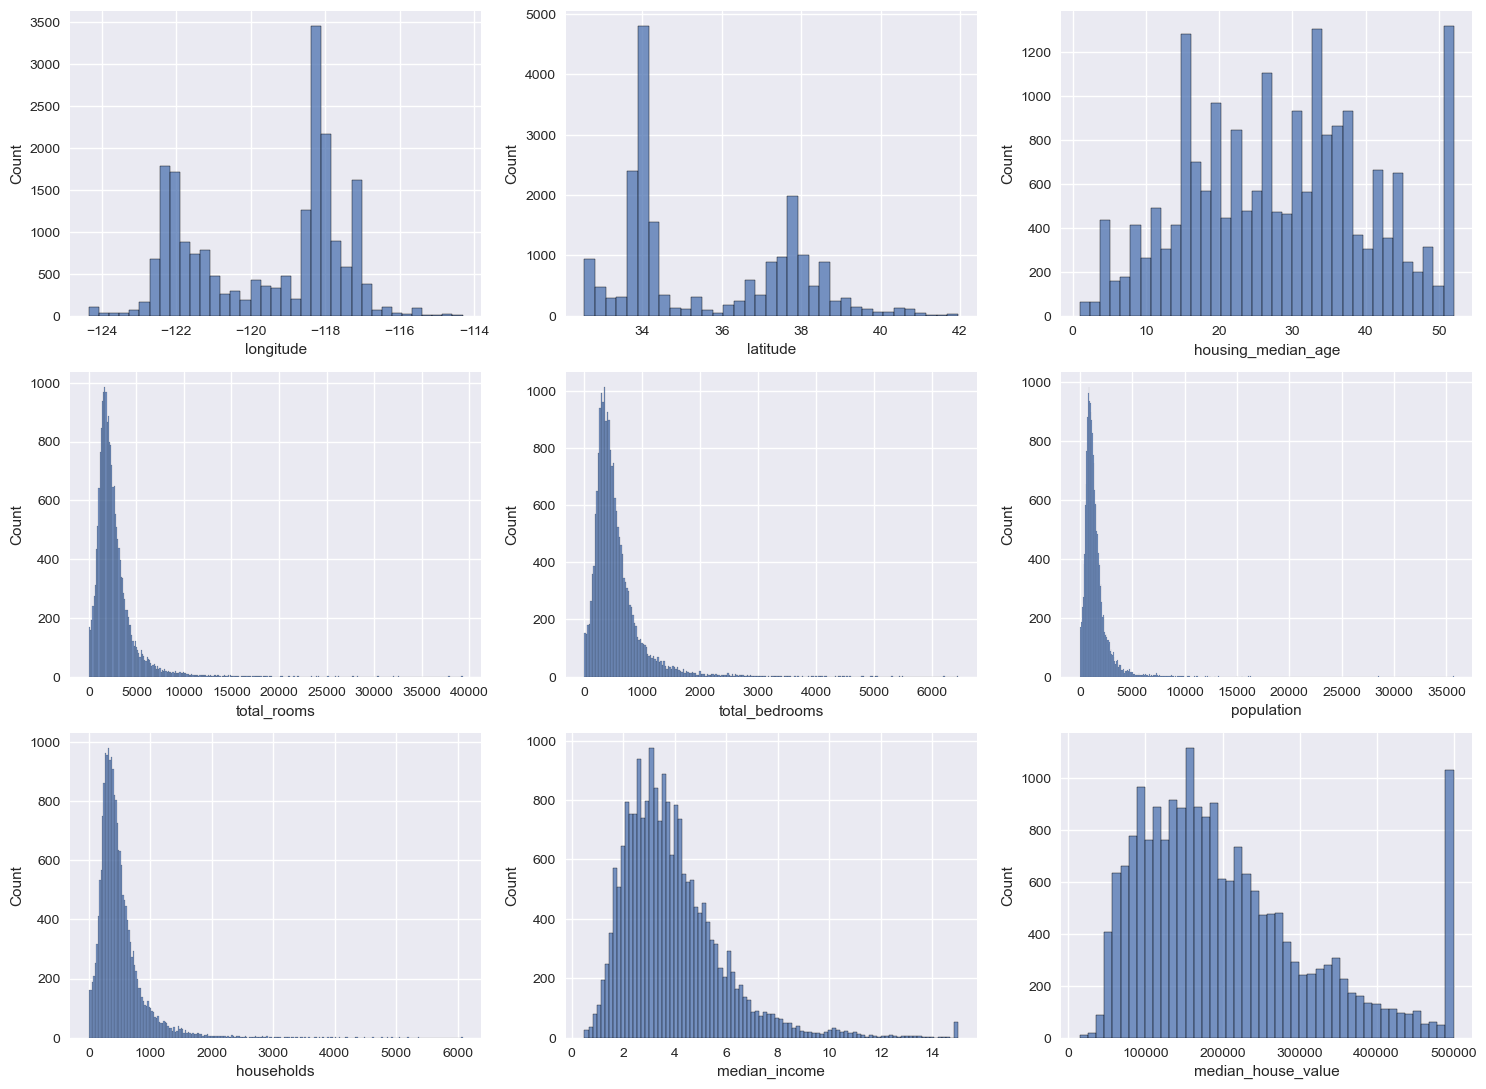

In [67]:
plt.style.use("seaborn-v0_8")

labels = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig,axes =  plt.subplots(3,3,figsize=(15,11))
axes = axes.flatten()

i = 0

for label in labels:
    sns.histplot(data=housing[label], ax=axes[i])
    i = i + 1

plt.tight_layout()


### Median Income Distribution Analysis

`median_income` is a key feature for predicting housing prices and has a strong influence on the target variable.  
Therefore, it is important that this feature is properly analyzed and that its distribution is fairly represented in both the training and test datasets.

The histogram shows that the distribution of `median_income` is **right-skewed**, with a higher concentration of observations in the lower income ranges and fewer samples at higher income levels.

If the dataset is split randomly, this skewness may result in an imbalanced representation of income categories in the test set, leading to biased model evaluation.  
To address this issue, the data should be split using a method that preserves the overall distribution of `median_income` across both the training and test sets, such as stratified sampling.

This approach ensures that model performance is evaluated on a test set that is representative of the underlying data distribution.


In [53]:
housing['median_income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]
                                     )
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


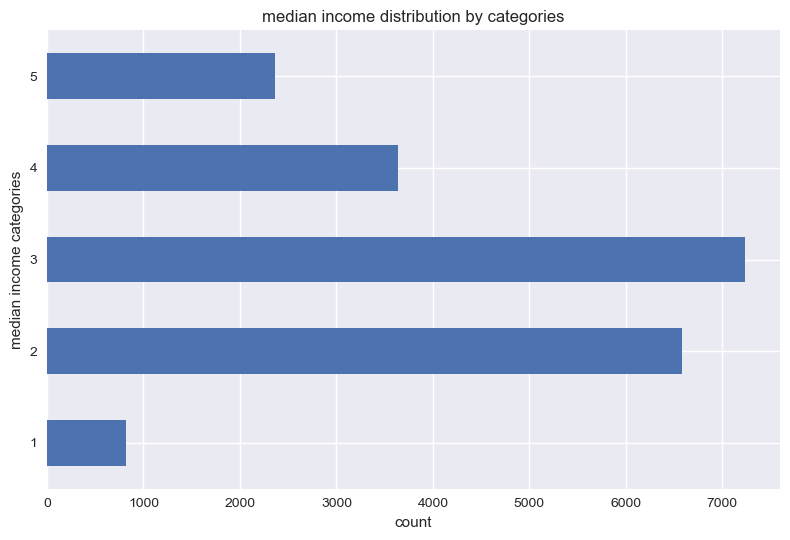

In [68]:

housing['median_income_cat'].value_counts().sort_index().plot(kind='barh',)
plt.title('median income distribution by categories')
plt.ylabel('median income categories')
plt.xlabel('count')
plt.tight_layout()
plt.show()

separate train,test data based on meadian income

In [78]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for train_idx, test_idx in splitter.split(housing, housing['median_income']):
    strat_train_test = housing.loc[train_idx]
    strat_test_test = housing.loc[test_idx]



ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [76]:
strat_train_test['median_income_cat'].value_counts() / len(strat_train_test)

median_income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [77]:
strat_test_test['median_income_cat'].value_counts() / len(strat_test_test)

median_income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64